In [78]:
import pandas as pd       
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import os
import seaborn as sns

In [2]:
df = pd.read_csv("speakers_all.csv", header=0)


print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

(2172, 12) is the shape of the dataset
------------------------
    age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0        788   senegal           True         NaN          NaN         NaN  
1       1953  cameroon           True         NaN          NaN         NaN  
2       1037   nigeria           True         NaN          NaN         NaN  
3       1165     haiti           True         NaN          NaN         NaN  
4       1166     haiti           True         NaN          NaN         NaN  


Удалим неопределенные столбцы

In [3]:
df.drop(df.columns[9:12],axis = 1, inplace = True)
print(df.columns)
df.describe()

Index(['age', 'age_onset', 'birthplace', 'filename', 'native_language', 'sex',
       'speakerid', 'country', 'file_missing?'],
      dtype='object')


,age,age_onset,speakerid
count,2172.000000,2172.000000,2172.000000
mean,33.117173,8.833333,1088.449355
std,14.453039,8.451127,628.420329
min,0.000000,0.000000,1.000000
25%,22.000000,0.000000,543.750000
50%,28.000000,8.000000,1088.500000
75%,41.000000,13.000000,1632.250000
max,97.000000,86.000000,2176.000000


### Удалим записи, не соответствующие странам с минимум 30 респондентами в выборке

In [4]:
from collections import Counter
countr = Counter(list(df['country']))
new_countries = [x for x, y in countr.items() if y >= 30]

In [5]:
for i in range(len(list(df['country']))):
    if df['country'][i] not in new_countries:
        df.drop([i], inplace = True)

In [6]:
print(df.head())

     age  age_onset              birthplace   filename native_language  \
9   73.0        5.0  pepeekeo, hawai'i, usa    hawai'i         hawai'i   
10  69.0        4.0     pa'ia, hawai'i, usa    hawai'i         hawai'i   
20  25.0        5.0   jammu, kashmir, india   poonchi1         poonchi   
50  20.0        5.0   addis ababa, ethiopia   amharic1         amharic   
51  29.0       19.0        gonder, ethiopia  amharic10         amharic   

       sex  speakerid   country  file_missing?  
9     male       1675       usa           True  
10  female       1676       usa           True  
20    male        425     india           True  
50  female          6  ethiopia          False  
51  female        998  ethiopia          False  


### Получим сумму zero-crossing по каждой из записей

/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


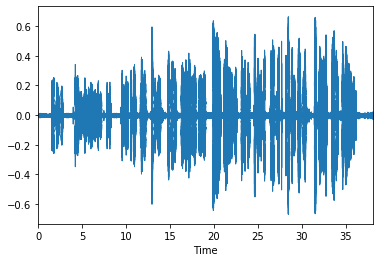

In [11]:
x, sr = librosa.load('recordings/amharic1.mp3')
librosa.display.waveplot(x, sr=sr)

In [13]:
df = df[df['file_missing?'] == False]
print(df.head())

     age  age_onset             birthplace   filename native_language     sex  \
50  20.0        5.0  addis ababa, ethiopia   amharic1         amharic  female   
51  29.0       19.0       gonder, ethiopia  amharic10         amharic  female   
52  24.0       17.0  addis ababa, ethiopia  amharic11         amharic  female   
53  26.0       15.0  addis ababa, ethiopia  amharic12         amharic  female   
54  28.0        6.0  addis ababa, ethiopia  amharic13         amharic  female   

    speakerid   country  file_missing?  
50          6  ethiopia          False  
51        998  ethiopia          False  
52       1129  ethiopia          False  
53       1130  ethiopia          False  
54       1131  ethiopia          False  


In [20]:
%%time
zero_crossings = []
for name in list(df['filename']):
    path = 'recordings/' + name + '.mp3'
    x, sr = librosa.load(path)
    zero_crossings.append(sum(librosa.zero_crossings(x)))

/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Try

CPU times: user 41min 23s, sys: 26.9 s, total: 41min 49s
Wall time: 42min 6s


In [21]:
df['zero_crossings'] = zero_crossings

In [22]:
df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,zero_crossings
50,20.0,5.0,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,False,67653
51,29.0,19.0,"gonder, ethiopia",amharic10,amharic,female,998,ethiopia,False,73627
52,24.0,17.0,"addis ababa, ethiopia",amharic11,amharic,female,1129,ethiopia,False,80457
53,26.0,15.0,"addis ababa, ethiopia",amharic12,amharic,female,1130,ethiopia,False,64523
54,28.0,6.0,"addis ababa, ethiopia",amharic13,amharic,female,1131,ethiopia,False,103747


### Проведем ANOVA-анализ по аттрибутам родного языка, пола и возраста для уровня значимости 0.15, игнорируя дискретность признака zero-crossing и учитывая также межфакторное взаимодействие.

### Трехфакторный дисперсионный анализ

In [188]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Сделаем возраст категориальным признаком, пусть будет 3 категории young, middle и old

In [189]:
age_C = []
for age in df['age']:
    if age <= 24:
        age_C.append('young')
    elif age <= 39:
        age_C.append('middle')
    else:
        age_C.append('old')

In [190]:
df['age_C'] = age_C

In [191]:
model = ols('zero_crossings ~ C(age_C)*C(native_language)*C(sex)', df).fit()

In [192]:
table_F = sm.stats.anova_lm(model, typ=1)
table_F

,df,sum_sq,mean_sq,F,PR(>F)
C(age_C),2.0,1.378560e+10,6.892801e+09,9.627279,7.299040e-05
C(native_language),55.0,2.769801e+11,5.036001e+09,7.033859,5.383921e-41
C(sex),1.0,1.128203e+10,1.128203e+10,15.757786,7.776109e-05
C(age_C):C(native_language),110.0,1.156433e+11,1.051303e+09,1.468370,2.112187e-03
C(age_C):C(sex),2.0,1.269504e+09,6.347522e+08,0.886568,4.124291e-01
C(native_language):C(sex),55.0,3.828072e+10,6.960131e+08,0.972132,5.339112e-01
C(age_C):C(native_language):C(sex),110.0,5.769169e+10,5.244699e+08,0.732535,9.799655e-01
Residual,895.0,6.407893e+11,7.159657e+08,NaN,NaN


In [193]:
# значимые признаки
table_F[table_F['PR(>F)'] < 0.15]

,df,sum_sq,mean_sq,F,PR(>F)
C(age_C),2.0,1.378560e+10,6.892801e+09,9.627279,7.299040e-05
C(native_language),55.0,2.769801e+11,5.036001e+09,7.033859,5.383921e-41
C(sex),1.0,1.128203e+10,1.128203e+10,15.757786,7.776109e-05
C(age_C):C(native_language),110.0,1.156433e+11,1.051303e+09,1.468370,2.112187e-03


In [194]:
table_F[table_F['PR(>F)'] > 0.15]

,df,sum_sq,mean_sq,F,PR(>F)
C(age_C):C(sex),2.0,1.269504e+09,6.347522e+08,0.886568,0.412429
C(native_language):C(sex),55.0,3.828072e+10,6.960131e+08,0.972132,0.533911
C(age_C):C(native_language):C(sex),110.0,5.769169e+10,5.244699e+08,0.732535,0.979966


Найдем родные языки с вхождением больше 50

In [195]:
nl = Counter(list(df['native_language']))
new_nl = [x for x, y in nl.items() if y > 30]

In [196]:
new_nl

['arabic',
 'english',
 'italian',
 'korean',
 'mandarin',
 'polish',
 'portuguese',
 'turkish']

In [197]:
for native_language in new_nl:
    model = ols('zero_crossings ~ C(age_C)*C(native_language)*C(sex)', df[df['native_language'] == native_language]).fit()
    table_F = sm.stats.anova_lm(model, typ=1)
    print('------------------------------------------------') 
    print(native_language)
    print(table_F[table_F['PR(>F)'] < 0.15])
    print('------------------------------------------------') 

------------------------------------------------
arabic
           df        sum_sq       mean_sq         F    PR(>F)
C(age_C)  2.0  1.361056e+10  6.805279e+09  5.049674  0.012638
------------------------------------------------
------------------------------------------------
english
           df        sum_sq       mean_sq          F    PR(>F)
C(age_C)  2.0  3.040936e+09  1.520468e+09   3.226834  0.040490
C(sex)    1.0  7.114793e+09  7.114793e+09  15.099466  0.000115
------------------------------------------------
------------------------------------------------
italian
Empty DataFrame
Columns: [df, sum_sq, mean_sq, F, PR(>F)]
Index: []
------------------------------------------------
------------------------------------------------
korean
           df        sum_sq       mean_sq         F    PR(>F)
C(age_C)  2.0  1.084846e+10  5.424231e+09  6.409622  0.003553
------------------------------------------------
------------------------------------------------
mandarin
               

Видим, что возраст является значимым признаком для арабского, английского, корейского родных языков. Пол – для английского, мандаринского, а межфакторное взаимодействие имеет значимость только для мандаринского языка.

## Проведем двухфакторный анализ для разных категорий возрастов

### Анализ для категории young

In [198]:
model = ols('zero_crossings ~ C(native_language)*C(sex)', df[df['age_C'] == 'young']).fit()
table_F = sm.stats.anova_lm(model, typ=1)
table_F[table_F['PR(>F)'] < 0.15]

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),34.0,6.158353e+10,1.811280e+09,2.400436,0.000037
C(native_language):C(sex),34.0,3.355213e+10,9.868273e+08,1.307813,0.121632


Значимы только родной язык и межфакторное взаимодействие

### Анализ для категории middle

In [199]:
model = ols('zero_crossings ~ C(native_language)*C(sex)', df[df['age_C'] == 'middle']).fit()
table_F = sm.stats.anova_lm(model, typ=1)
table_F[table_F['PR(>F)'] < 0.15]

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),35.0,3.965809e+10,1.133088e+09,1.662157,0.013275
C(sex),1.0,7.508926e+09,7.508926e+09,11.015044,0.001011


Значимы только родной язык и пол

### Анализ для категории old

In [200]:
model = ols('zero_crossings ~ C(native_language)*C(sex)', df[df['age_C'] == 'old']).fit()
table_F = sm.stats.anova_lm(model, typ=1)
table_F[table_F['PR(>F)'] < 0.15]

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),29.0,2.164968e+11,7.465407e+09,10.678375,6.908657e-28
C(sex),1.0,5.514539e+09,5.514539e+09,7.887892,5.439379e-03


Значимы только родной язык и пол

## Проведем однофакторный анализ для разных категорий полов в зависимости от возраста

### Анализ для молодых девушек и парней

In [201]:
model = ols('zero_crossings ~ C(native_language)', df[(df['age_C'] == 'young') & 
                                                   (df['sex'] == 'female')]).fit()
table_F = sm.stats.anova_lm(model, typ=1)
table_F[table_F['PR(>F)'] < 0.15]

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),25.0,3.229371e+10,1.291748e+09,2.286113,0.001035


In [202]:
model = ols('zero_crossings ~ C(native_language)', df[(df['age_C'] == 'young') & 
                                                   (df['sex'] == 'male')]).fit()
table_F = sm.stats.anova_lm(model, typ=1)
table_F[table_F['PR(>F)'] < 0.15]

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),26.0,4.747179e+10,1.825838e+09,1.990192,0.004497


In [203]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(
    df[(df['age_C'] == 'young') & (df['sex'] == 'female')]['zero_crossings'], 
    df[(df['age_C'] == 'young') & (df['sex'] == 'female')]['native_language'])
result = mc.tukeyhsd()
print(result)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------
   amharic     arabic   9484.0357    0.9  -46240.1526   65208.224  False
   amharic  cantonese   6304.1786    0.9  -49420.0097  62028.3669  False
   amharic      dutch     11915.3    0.9  -36780.0007  60610.6007  False
   amharic    english  -7576.8343    0.9  -53017.3132  37863.6446  False
   amharic     french   -28442.25    0.9 -105436.2807  48551.7807  False
   amharic     german    -18432.0    0.9  -72875.0012  36011.0012  False
   amharic      greek    14449.75    0.9  -84949.1163 113848.6163  False
   amharic      hindi -11168.5833    0.9  -79070.9359  56733.7692  False
   amharic    italian    -3721.25    0.9  -80715.2807  73272.7807  False
   amharic      khmer    22602.75    0.9  -76796.1163 122001.6163  False
   amharic     korean     85.1136    0.9  -51824.25

In [204]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(
    df[(df['age_C'] == 'young') & (df['sex'] == 'male')]['zero_crossings'], 
    df[(df['age_C'] == 'young') & (df['sex'] == 'male')]['native_language'])
result = mc.tukeyhsd()
print(result)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------
   amharic     arabic -36751.5833    0.9 -102344.8838  28841.7171  False
   amharic   armenian   -99081.25 0.4083 -226102.1301  27939.6301  False
   amharic  cantonese -44963.4167  0.826  -118298.956  28372.1226  False
   amharic      dutch   -25732.25    0.9  -99067.7893  47603.2893  False
   amharic    english -65648.5682 0.0086 -123477.6369  -7819.4995   True
   amharic     french   -62001.25 0.2441 -135336.7893  11334.2893  False
   amharic     german   -56852.05 0.5001  -133064.578   19360.478  False
   amharic      greek   -23265.25    0.9 -150286.1301 103755.6301  False
   amharic   gujarati   -59735.25 0.6413 -146507.0303  27036.5303  False
   amharic      hindi   -81923.75 0.2722 -180313.7006  16466.2006  False
   amharic    italian  -51758.625 0.5051 -121330.82

Можно посмотреть различия суммы zero_crossing для молодых людей и девушек в зависимости от родного языка. Например у датчанинов эта сумма ниже чем у хинди.

### Для людей среднего возраста посмотрим на различия в зависимости от родного языка

In [205]:
mc = MultiComparison(
    df[df['age_C'] == 'middle']['zero_crossings'], 
    df[df['age_C'] == 'middle']['native_language'])
result = mc.tukeyhsd()
print(result)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------
   amharic     arabic  -7925.8333    0.9  -49613.0821  33761.4154  False
   amharic    bengali -42119.6333 0.8609 -109338.3022  25099.0356  False
   amharic  cantonese     -1036.9    0.9   -46702.993   44629.193  False
   amharic      dutch    -22434.3    0.9 -129530.7812  84662.1812  False
   amharic    english -29440.3183 0.1869  -62701.0316   3820.3951  False
   amharic    finnish    -19374.3    0.9 -126470.7812  87722.1812  False
   amharic     french    -32362.3    0.9 -139458.7812  74734.1812  False
   amharic     german -36933.5857 0.5821  -87255.1693  13387.9979  False
   amharic   gujarati    -27855.3    0.9  -95073.9689  39363.3689  False
   amharic    hadiyya    -22925.3    0.9 -130021.7812  84171.1812  False
   amharic      hindi -28463.8714    0.9   -78785.4

У арабов по сравнению почти со всеми серднее значение zero_crossing ниже, кроме русских и поляков

### Для людей пожилого возраста посмотрим на различия в зависимости от родного языка  и пола

In [206]:
mc = MultiComparison(
    df[df['age_C'] == 'old']['zero_crossings'], 
    df[df['age_C'] == 'old']['native_language'])
result = mc.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
  group1     group2     meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------------
   amharic     arabic   54893.1667    0.9  -37706.7964  147493.1297  False
   amharic        bai     337886.5  0.001  213650.6127  462122.3873   True
   amharic   bavarian     -14510.5    0.9 -115948.6772   86927.6772  False
   amharic    bengali     -41926.5    0.9 -166162.3873   82309.3873  False
   amharic      dutch     -33043.5    0.9 -134481.6772   68394.6772  False
   amharic    english  -32900.5256    0.9 -105086.4767   39285.4254  False
   amharic      farsi      20873.5    0.9 -103362.3873  145109.3873  False
   amharic     french     -18107.0    0.9 -105955.0383   69741.0383  False
   amharic        gan      75448.5 0.8653  -48787.3873  199684.3873  False
   amharic      gedeo     -37005.5    0.9 -161241.3873   87230.3873  False
   amharic     german    

Примерно аналогичная ситуация как и с людьми среднего возраста

In [207]:
mc = MultiComparison(
    df[df['age_C'] == 'old']['zero_crossings'], 
    df[df['age_C'] == 'old']['sex'])
result = mc.tukeyhsd()
print(result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
female   male -12592.5712 0.0084 -21929.2931 -3255.8494   True
--------------------------------------------------------------


У пожилых женщин сумма zero crossing ниже чем у мужчин